# Universidad Autónoma de Yucatán

## Facultad de Matemáticas

### Machine Learning

**Teacher:** Dr. Victor Uc Cetina

**Student:** Dayan Bravo Fraga

# Ada Boost

## Download Corpus from GitHub (only for Colab)

In [2]:
import sys
import os

in_colab: bool = 'google.colab' in sys.modules
if in_colab:
    print('Is running in Colab')
    if not os.path.isdir('machine_learning'):
        print("Downloading project")
        get_ipython().system('git clone https://github.com/dayan3847/machine_learning')
        sys.path.insert(0, './machine_learning/')
    else:
        get_ipython().system('git -C ./machine_learning fetch')
        get_ipython().system('git -C ./machine_learning rebase')
    if not os.path.isdir('data'):
        print('Copying data folder')
        get_ipython().system('cp -r ./machine_learning/dayan3847/ada_boost/data ./')
else:
    print('Is not running in Colab')

Is not running in Colab


## Import libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# My libraries
from dayan3847.ada_boost.src.AdaBoost import AdaBoost
from dayan3847.ada_boost.src.WeakClassifier import WeakClassifier
from dayan3847.ada_boost.src.Plotter import Plotter

## Import Data

In [4]:
the_data = np.loadtxt('./data/dataCircle_fix.txt', delimiter=' ')
the_data[:4]

array([[ 0.     ,  0.     ,  1.     ],
       [-3.70962, -5.3521 ,  1.     ],
       [-1.42211, -2.40219,  1.     ],
       [-2.66972,  4.30397,  1.     ]])

## Transpose Data

In [5]:
the_data_t = the_data.T
the_data_t.T[:4].T

array([[ 0.     , -3.70962, -1.42211, -2.66972],
       [ 0.     , -5.3521 , -2.40219,  4.30397],
       [ 1.     ,  1.     ,  1.     ,  1.     ]])

## Create Ada Boost Controller

In [7]:
ada_boost = AdaBoost(the_data_t)
ada_boost.data.T[:4].T

array([[ 0.     , -3.70962, -1.42211, -2.66972],
       [ 0.     , -5.3521 , -2.40219,  4.30397],
       [ 1.     ,  1.     ,  1.     ,  1.     ]])

## Data Count

In [8]:
ada_boost.data_count

102

## Add Weight Column

In [9]:
ada_boost.add_weight_row().T[:4].T

array([[ 0.        , -3.70962   , -1.42211   , -2.66972   ],
       [ 0.        , -5.3521    , -2.40219   ,  4.30397   ],
       [ 1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.00980392,  0.00980392,  0.00980392,  0.00980392]])

## Plot Data Points

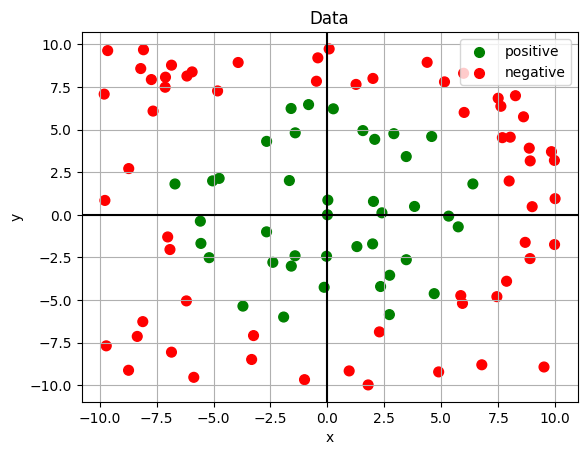

In [10]:
plotter: Plotter = Plotter(False)
plotter.plot_data(ada_boost.data)
plotter.show()

## Normalize Data

In [11]:
ada_boost.normalize_data().T[:4].T

array([[4.95108014e+01, 3.07663817e+01, 4.23249908e+01, 3.60209151e+01],
       [5.06309292e+01, 2.34556806e+01, 3.84338271e+01, 7.24843055e+01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [9.80392157e-03, 9.80392157e-03, 9.80392157e-03, 9.80392157e-03]])

## Plot Normalized Data Points

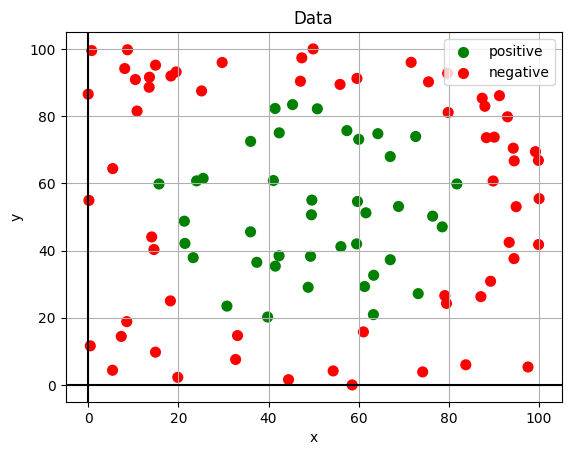

In [12]:
plotter.plot_data(ada_boost.data)
plotter.show()

## Add a classifier

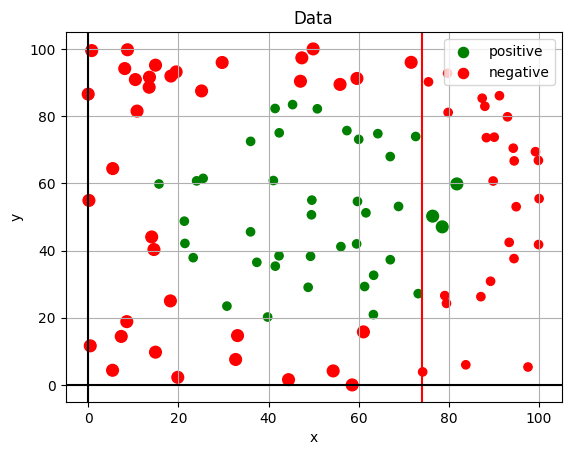

In [13]:
ada_boost.add_classifier(True)

## Add 100 Classifiers

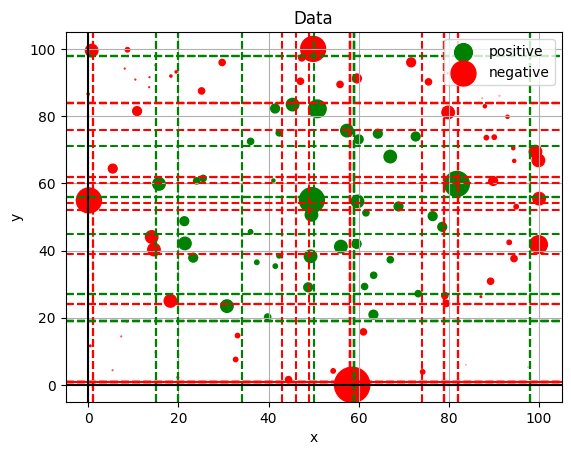

In [14]:
ada_boost.add_classifier_loop(100)
ada_boost.add_classifier(True)

## Accuracy History

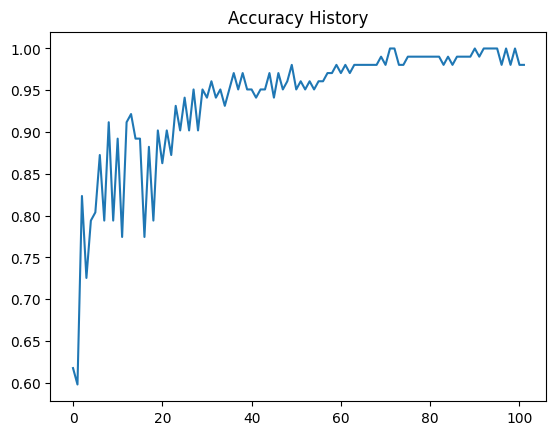

In [15]:
plt.clf()
plt.title('Accuracy History')
plt.plot(ada_boost.accuracy_history)
plt.show()